<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Загрузка и подготовка данных

Начнем исследование с общего обзора данных. Для этого сразу импортируем всё, что необходимо для исследования. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from scipy import stats as st

Прочитаем файлы. Т.к. проект выполняется локально, а не на платформе, используем конструкцию try-except, чтобы избежать ошибки: 

In [2]:
try:
    data_0 = pd.read_csv('C:/Users/freak/Desktop/Python/ML_oil_extraction_project/geo_data_0.csv')
    data_1 = pd.read_csv('C:/Users/freak/Desktop/Python/ML_oil_extraction_project/geo_data_1.csv')
    data_2 = pd.read_csv('C:/Users/freak/Desktop/Python/ML_oil_extraction_project/geo_data_2.csv')
except: 
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Получим общую информацию о датасетах: 

In [3]:
for data in [data_0, data_1, data_2]: 
    print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column

Можно заметить отсутствие пропусков в датасетах.

Проверим наличие дубликатов: 

In [4]:
for data in [data_0, data_1, data_2]: 
    print('Кол-во дубликатов:', data.duplicated().sum(), end='\n\n')

Кол-во дубликатов: 0

Кол-во дубликатов: 0

Кол-во дубликатов: 0



Ознакомимся с форматом таблиц: 

In [5]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Посмотрим на распределение данных: 

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

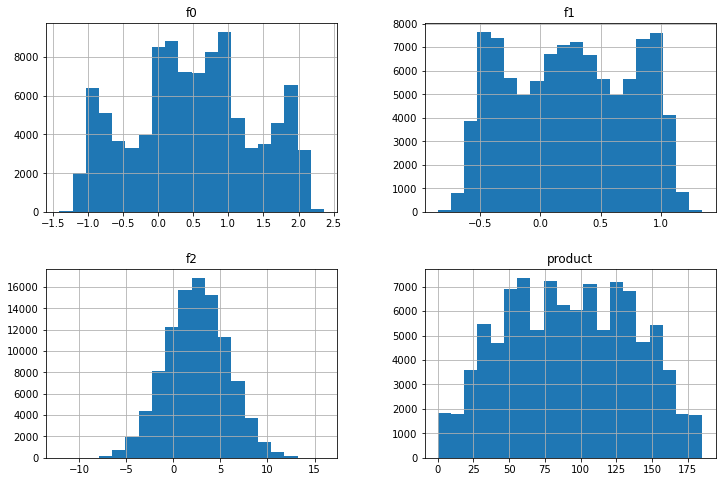

In [8]:
data_0.hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

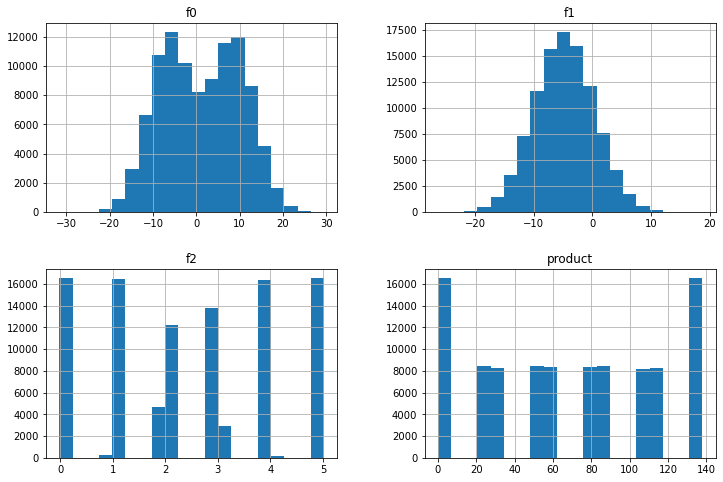

In [9]:
data_1.hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

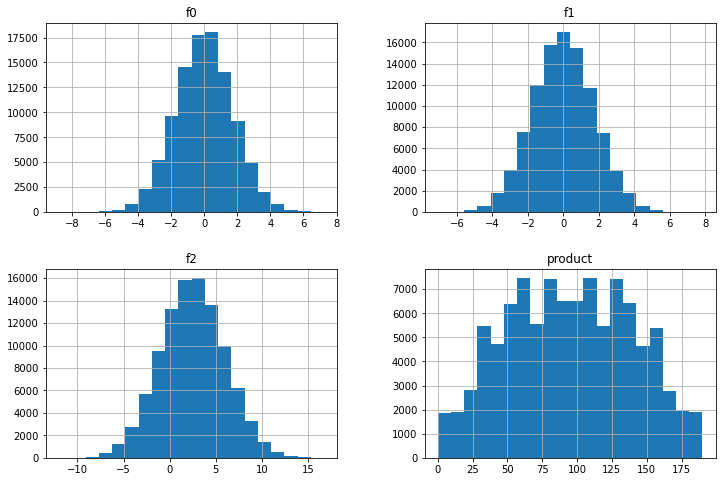

In [10]:
data_2.hist(bins=20, figsize=(12, 8))

**Выводы:**
- В данных отсутствуют пропуски и дубликаты; 
- Можно заметить, что некоторые признаки распределены не нормально. Однако, так как значение признаков неизвестно, трудно дать более адекватную оценку распределению. 

## Обучение и проверка модели

Разделим данные на признаки и целевой признак:

In [11]:
features = ['f0', 'f1', 'f2']
target = ['product']

features_0 = data_0[features]
target_0 = data_0[target]

features_1 = data_1[features]
target_1 = data_1[target]

features_2 = data_2[features]
target_2 = data_2[target]

Согласно техническому заданию, для нашего проекта будем использовать линейную регрессию. 

Попробуем решить вопрос с помощью функции. Затем выведем на экран средний запас предсказанного сырья и RMSE модели.

In [12]:
def LinReg(features, target):
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                                  test_size=0.25, random_state=123)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predict = model.predict(features_valid)

    predict_mean = predict.mean()
    rmse = mean_squared_error(target_valid, predict)**0.5

    print('Cредний запас предсказанного сырья:', round(predict_mean, 2))
    print('RMSE:', round(rmse, 2))
    
    return target_valid, predict

**Регион 0 (geo_data_0.csv):**

In [13]:
target_0_valid, predict_0 = LinReg(features_0, target_0)

Cредний запас предсказанного сырья: 92.55
RMSE: 37.65


**Регион 1 (geo_data_1.csv):**

In [14]:
target_1_valid, predict_1 = LinReg(features_1, target_1)

Cредний запас предсказанного сырья: 69.28
RMSE: 0.9


**Регион 2 (geo_data_2.csv):**

In [15]:
target_2_valid, predict_2 = LinReg(features_2, target_2)

Cредний запас предсказанного сырья: 95.1
RMSE: 40.13


**Выводы:**
- В регионах №0 и №2 можно увидеть очень высокие показатели среднего запаса сырья (92,55 и 95,1). Вместе с этим показатели RMSE в этих регионах также очень выскокие (37,65 и 40,13). Это может указывать на низкое качество модели регрессии. 
- В регионе №1 средний запас предсказанного сырья заметно ниже (69,28). Одновременно с этим и значение RMSE намного ниже, чем в двух других регионах. Можно сказать, что для этого региона качество предсказаний оказалось высоким. 

## Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Затем сравним полученный объём сырья со средним запасом в каждом регионе.

Создадим отдельные переменные для ключевых значений:

In [16]:
BUDGET = 1e+10 #бюджет на разработку скважин в регионе — 10 млрд рублей
BEST_WELLSITES = 200 #200 лучших скважин из выбранных 500
SAMPLE_WELLSITES = 500 #500 случайно выбранных скважин 
PROFIT_PER_UNIT = 4.5e+5 #доход с каждой единицы продукта составляет 450 тыс. рублей

In [17]:
product_amount = BUDGET / (BEST_WELLSITES * PROFIT_PER_UNIT)

In [18]:
print('Достаточный объём сырья для безубыточной разработки новой скважины', round(product_amount, 2))

Достаточный объём сырья для безубыточной разработки новой скважины 111.11


**Вывод:**

Достаточный объём сырья для безубыточной разработки новой скважины 111.11. Такой объем достигается при разработке 200 лучших скважин из 500 выбранных для каждого региона. Этот объем превышает показатели, полученные в предыдущем пункте. 

## Расчёт прибыли и рисков 

Преобразуем данные, чтобы избежать ошибки при дальнейшей работе: 

In [19]:
target_0_valid_upd = pd.Series(target_0_valid['product']).reset_index(drop=True)
target_1_valid_upd = pd.Series(target_1_valid['product']).reset_index(drop=True)
target_2_valid_upd = pd.Series(target_2_valid['product']).reset_index(drop=True)

In [20]:
predict_0_upd = pd.Series(*predict_0.reshape(1,-1))
predict_1_upd = pd.Series(*predict_1.reshape(1,-1))
predict_2_upd = pd.Series(*predict_2.reshape(1,-1))

**Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:**
- Выберем скважины с максимальными значениями предсказаний.
- Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитаем прибыль для полученного объёма сырья.


In [21]:
def income(true_target, predicted_target):
    sort_Series = pd.Series(predicted_target).sort_values(ascending=False)[:BEST_WELLSITES]
    true_target_sorted = (true_target.reset_index(drop=True)[sort_Series.index])
    true_target_sorted_sum = true_target_sorted.sum() 
    return round((true_target_sorted_sum * PROFIT_PER_UNIT) - BUDGET, 2)

**Регион 0**

In [22]:
income(target_0_valid_upd, predict_0_upd)

3534670917.26

**Регион 1**

In [23]:
income(target_1_valid_upd, predict_1_upd)

2415086696.68

**Регион 2**

In [24]:
income(target_2_valid_upd, predict_2_upd)

2370343863.02

**Посчитаем риски и прибыль для каждого региона:**

- Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

- Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [25]:
state = np.random.RandomState(123) 

In [26]:
def confidence_interval(true_target, predicted_target):
    samples = []
    for i in range(1000):
        sample = pd.Series(predicted_target).sample(n=SAMPLE_WELLSITES, replace=True, random_state=state)
        samples.append(income(true_target,sample))
    samples = pd.Series(samples)
    print('Средняя прибыль:', samples.mean())
    print('Риски:', samples.apply(lambda x: x < 0).sum()/len(samples)*100,"%") 
    
    lower = samples.quantile(0.025)
    upper = samples.quantile(0.975)
    return print('95%-й доверительный интервал:', round(lower,2), round(upper,2))

**Регион 0**

In [27]:
confidence_interval(target_0_valid_upd, predict_0_upd)

Средняя прибыль: 477416824.26650023
Риски: 4.1000000000000005 %
95%-й доверительный интервал: -57993911.8 974822014.78


**Регион 1**

In [28]:
confidence_interval(target_1_valid_upd, predict_1_upd)

Средняя прибыль: 467477683.9188197
Риски: 1.0 %
95%-й доверительный интервал: 68764375.66 871492097.36


**Регион 2**

In [29]:
confidence_interval(target_2_valid_upd, predict_2_upd)

Средняя прибыль: 362132780.61962056
Риски: 8.9 %
95%-й доверительный интервал: -182992233.25 870966851.57


## Вывод

Согласно техническому заданию, рекомендовать можно только регион, в котором риск убытков ниже 2,5%. По результатам нашего исследования этому условию соответствует только _Регион 1_ со следующими характеристиками: 

- Средняя прибыль: 467477683.9188197

- Риски: 1.0 %

- 95%-й доверительный интервал: (68764375.66, 871492097.36)
